This notebook shows how BigBang can help you explore a mailing list archive.

First, use this IPython magic to tell the notebook to display matplotlib graphics inline. This is a nice way to display results.

In [1]:
%matplotlib inline

Import the BigBang modules as needed. These should be in your Python environment if you've installed BigBang correctly.

In [2]:
import bigbang.mailman as mailman
import bigbang.graph as graph
import bigbang.process as process
from bigbang.parse import get_date
#from bigbang.functions import *
from bigbang.archive import Archive

Also, let's import a number of other dependencies we'll use later.

In [3]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import numpy as np
import math
import pytz
import pickle
import os

pd.options.display.mpl_style = 'default' # pandas has a set of preferred graph formatting options

Now let's load the data for analysis.

In [4]:
urls = ["ipython-dev",
        "ipython-user"]

archives = [Archive(url,archive_dir="../archives",mbox=True) for url in urls]

activities = [arx.get_activity(resolved=False) for arx in archives]

/home/sb/projects/bigbang/bigbang/mailman.py:105: UserWarning: No mailing list name found at ipython-dev
  warnings.warn("No mailing list name found at %s" % url)
/home/sb/projects/bigbang/bigbang/mailman.py:105: UserWarning: No mailing list name found at ipython-user
  warnings.warn("No mailing list name found at %s" % url)


Opening 144 archive files
Opening 144 archive files


In [5]:
archives[0].data

,From,Subject,Date,In-Reply-To,References,Body
Message-ID,,,,,,
<3E9DE124.8080309@colorado.edu>,fperez@colorado.edu (Fernando Perez),[IPython-dev] Mailing lists indexed at gmane,2003-04-16 23:03:00,None,None,"Hi all,\n\nafter a suggestion by Jacek Generow..."
<3E9DE124.8080309@colorado.edu>,fperez at colorado.edu (Fernando Perez),[IPython-dev] Mailing lists indexed at gmane,2003-04-16 23:03:00,None,None,"Hi all,\n\nafter a suggestion by Jacek Generow..."
<3E9E4094.7030802@colorado.edu>,fperez@colorado.edu (Fernando Perez),[IPython-dev] Re: Refactoring of bdist_wininst...,2003-04-17 05:50:12,<003d01c28a9a$3dcb8560$e301340a@cyberhigh.fcoe...,<003d01c28a9a$3dcb8560$e301340a@cyberhigh.fcoe...,"Hi Cory,\n\n> Done. install command will now ..."
<3E9E4094.7030802@colorado.edu>,fperez at colorado.edu (Fernando Perez),[IPython-dev] Re: Refactoring of bdist_wininst...,2003-04-17 05:50:12,<003d01c28a9a$3dcb8560$e301340a@cyberhigh.fcoe...,<003d01c28a9a$3dcb8560$e301340a@cyberhigh.fcoe...,"Hi Cory,\n\n> Done. install command will now ..."
<000c01c304ee$3cb79e60$e901340a@cyberhigh.fcoe.k12.ca.us>,cdodt@fcoe.k12.ca.us (Cory Dodt),[IPython-dev] RE: Refactoring of bdist_wininst...,2003-04-17 14:32:56,<3E9E4094.7030802@colorado.edu>,None,Distutils 1.0.3 is not included with Python 2....
<000c01c304ee$3cb79e60$e901340a@cyberhigh.fcoe.k12.ca.us>,cdodt at fcoe.k12.ca.us (Cory Dodt),[IPython-dev] RE: Refactoring of bdist_wininst...,2003-04-17 14:32:56,<3E9E4094.7030802@colorado.edu>,None,Distutils 1.0.3 is not included with Python 2....
<3E9EC1CA.3060800@colorado.edu>,fperez@colorado.edu (Fernando Perez),[IPython-dev] RE: Refactoring of bdist_wininst...,2003-04-17 15:01:30,<000c01c304ee$3cb79e60$e901340a@cyberhigh.fcoe...,<000c01c304ee$3cb79e60$e901340a@cyberhigh.fcoe...,Cory Dodt wrote:\n> Distutils 1.0.3 is not inc...
<3E9EC1CA.3060800@colorado.edu>,fperez at colorado.edu (Fernando Perez),[IPython-dev] RE: Refactoring of bdist_wininst...,2003-04-17 15:01:30,<000c01c304ee$3cb79e60$e901340a@cyberhigh.fcoe...,<000c01c304ee$3cb79e60$e901340a@cyberhigh.fcoe...,Cory Dodt wrote:\n> Distutils 1.0.3 is not inc...
<3E9EF5E3.8080100@colorado.edu>,fperez@colorado.edu (Fernando Perez),[IPython-dev] [Fwd: [ANN] A new IPython is out...,2003-04-17 18:43:47,None,None,"Hi all,\n\nI've just put out a new pre-release..."


This variable is for the range of days used in computing rolling averages.

In [6]:
window = 100

For each of the mailing lists we are looking at, plot the rolling average of number of emails sent per day.

/home/sb/anaconda/envs/bigbang/lib/python2.7/site-packages/matplotlib/font_manager.py:1236: UserWarning: findfont: Font family ['monospace'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


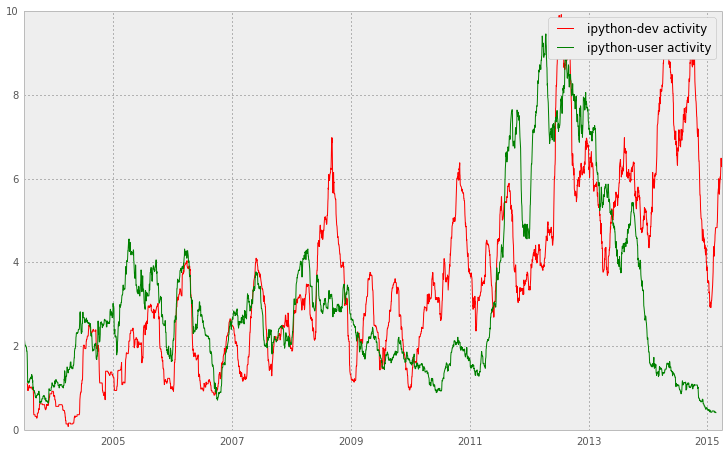

In [7]:
plt.figure(figsize=(12.5, 7.5))

for i, activity in enumerate(activities):

    colors = 'rgbkm'

    ta = activity.sum(1)
    rmta = pd.rolling_mean(ta,window)
    rmtadna = rmta.dropna()
    plt.plot_date(rmtadna.index,
                  rmtadna.values,
                  colors[i],
                  label=mailman.get_list_name(urls[i]) + ' activity',xdate=True)

    plt.legend()
    
plt.savefig("activites-marked.png")
plt.show()

In [8]:
arx.data

,From,Subject,Date,In-Reply-To,References,Body
Message-ID,,,,,,
<3271DBB88437ED41A0AB239E6C2554A401117873@ussunm001.palmsource.com>,Robin.Siebler at palmsource.com (Robin Siebler),[IPython-user] Crash,2003-03-27 20:27:08,None,None,"I installed IPython-0.2.15pre3, played with it..."
<3271DBB88437ED41A0AB239E6C2554A401117873@ussunm001.palmsource.com>,Robin.Siebler@palmsource.com (Robin Siebler),[IPython-user] Crash,2003-03-27 20:27:08,None,None,"I installed IPython-0.2.15pre3, played with it..."
<3E8364F0.2000107@colorado.edu>,fperez at colorado.edu (Fernando Perez),[IPython-user] Crash,2003-03-27 20:54:08,<3271DBB88437ED41A0AB239E6C2554A401117873@ussu...,<3271DBB88437ED41A0AB239E6C2554A401117873@ussu...,Robin Siebler wrote:\n> I installed IPython-0....
<3E8364F0.2000107@colorado.edu>,fperez@colorado.edu (Fernando Perez),[IPython-user] Crash,2003-03-27 20:54:08,<3271DBB88437ED41A0AB239E6C2554A401117873@ussu...,<3271DBB88437ED41A0AB239E6C2554A401117873@ussu...,Robin Siebler wrote:\n> I installed IPython-0....
<1048798697.25990.6.camel@localhost.localdomain>,jives at gorge.net (Jason Ives),[IPython-user] IPython under Jython?,2003-03-27 20:58:15,None,None,"Hi,\n\nI'm wondering if anyone's had success r..."
<1048798697.25990.6.camel@localhost.localdomain>,jives@gorge.net (Jason Ives),[IPython-user] IPython under Jython?,2003-03-27 20:58:15,None,None,"Hi,\n\nI'm wondering if anyone's had success r..."
<3E836641.8000008@colorado.edu>,fperez at colorado.edu (Fernando Perez),[IPython-user] IPython under Jython?,2003-03-27 20:59:45,<1048798697.25990.6.camel@localhost.localdomain>,<1048798697.25990.6.camel@localhost.localdomain>,Jason Ives wrote:\n\n> I'm wondering if anyone...
<3E836641.8000008@colorado.edu>,fperez@colorado.edu (Fernando Perez),[IPython-user] IPython under Jython?,2003-03-27 20:59:45,<1048798697.25990.6.camel@localhost.localdomain>,<1048798697.25990.6.camel@localhost.localdomain>,Jason Ives wrote:\n\n> I'm wondering if anyone...
<3271DBB88437ED41A0AB239E6C2554A401117875@ussunm001.palmsource.com>,Robin.Siebler@palmsource.com (Robin Siebler),[IPython-user] Crash,2003-03-27 21:13:13,None,None,I searched but couldn't find any such file.\n\...



Now, let's see: who are the authors of the most messages to one particular list?

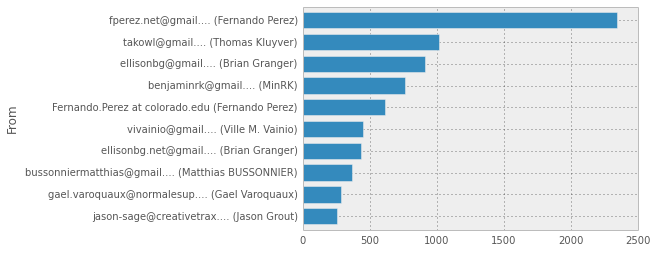

In [9]:
a  = activities[0] # for the first mailing list
ta = a.sum(0) # sum along the first axis
ta.sort()
ta[-10:].plot(kind='barh')

This might be useful for seeing the distribution (does the top message sender dominate?) or for identifying key participants to talk to.

---

Many mailing lists will have some duplicate senders: individuals who use multiple email addresses or are recorded as different senders when using the same email address. We want to identify those potential duplicates in order to get a more accurate representation of the distribution of senders.

To begin with, let's do a naive calculation of the similarity of the From strings, based on the [Levenshtein distance](https://en.wikipedia.org/wiki/Levenshtein_distance).

This can take a long time for a large matrix, so we will truncate it for purposes of demonstration.

In [10]:
import Levenshtein
distancedf = process.matricize(a.columns[:100], process.from_header_distance) # calculate the edit distance between the two From titles
df = distancedf.astype(int) # specify that the values in the matrix are integers

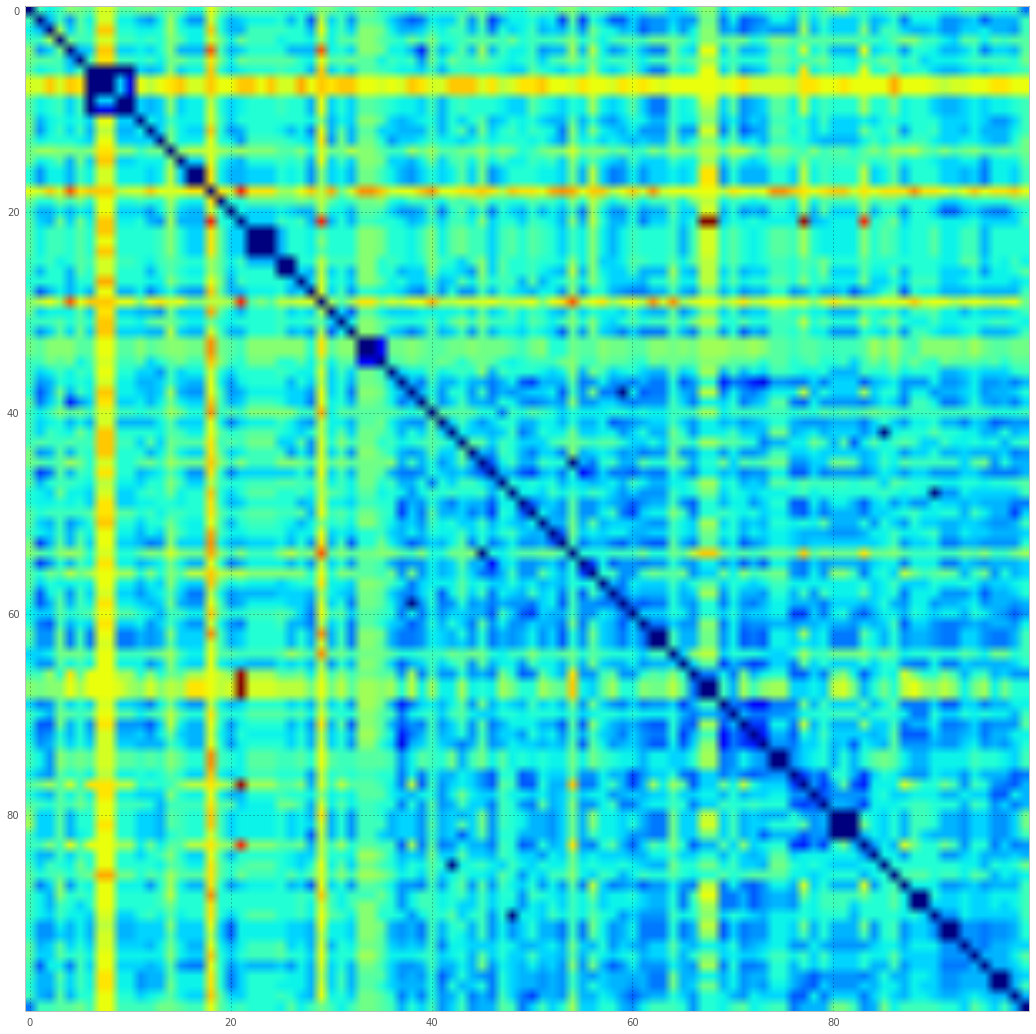

In [11]:
fig = plt.figure(figsize=(18, 18))
plt.imshow(df)
#plt.yticks(np.arange(0.5, len(df.index), 1), df.index) # these lines would show labels, but that gets messy
#plt.xticks(np.arange(0.5, len(df.columns), 1), df.columns)

The dark blue diagonal is comparing an entry to itself (we know the distance is zero in that case), but a few other dark blue patches suggest there are duplicates even using this most naive measure.